In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = pd.read_csv('daily_climate_data.csv')

data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [9]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [10]:
data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


In [11]:
# Checking for missing values
print(data.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [40]:
# Convert date column to datetime format for convenience
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [41]:
data.tail()

,date,meantemp,humidity,wind_speed,meanpressure,actual_rainfall,predicted_rainfall,year
109,2017-04-20,34.500,27.500000,5.562500,998.625000,-1.427937,-1.427938,2017
110,2017-04-21,34.250,39.375000,6.962500,999.875000,1.170962,1.170962,2017
111,2017-04-22,32.900,40.900000,8.890000,1001.600000,1.487690,1.487690,2017
112,2017-04-23,32.875,27.500000,9.962500,1002.125000,-1.465538,-1.465538,2017
113,2017-04-24,32.000,27.142857,12.157143,1004.142857,-1.566129,-1.566129,2017


In [13]:
#Univariate analysis

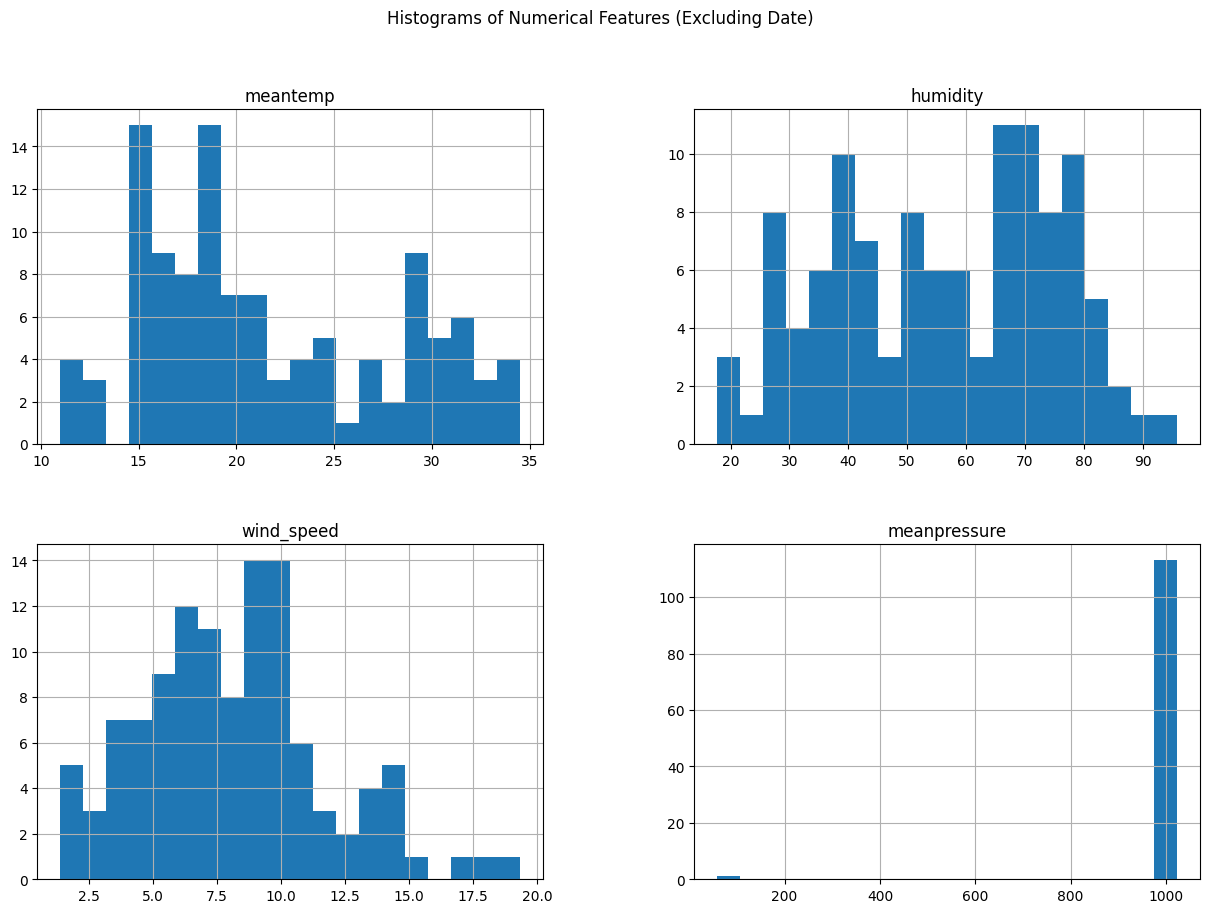

In [14]:
# Select only numerical columns, excluding 'Date'
numerical_data = data.select_dtypes(include=['number'])

# Plot histograms for numerical data only
numerical_data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features (Excluding Date)')
plt.show()

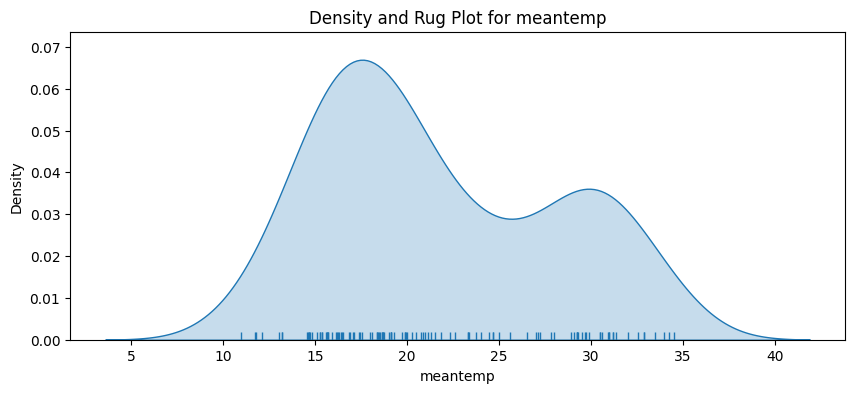

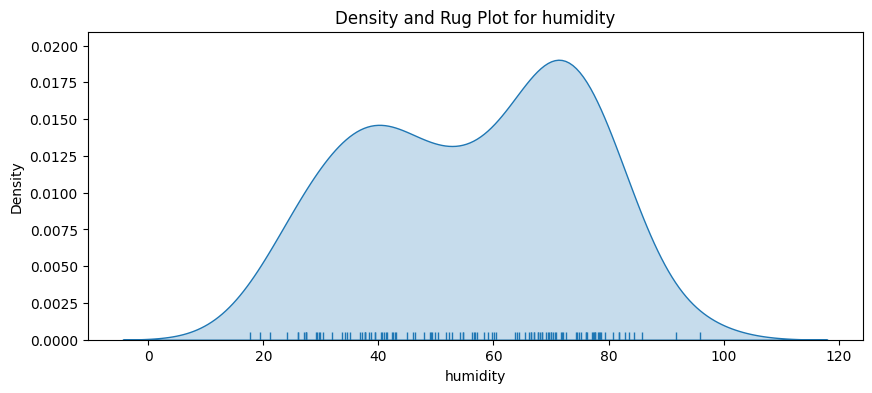

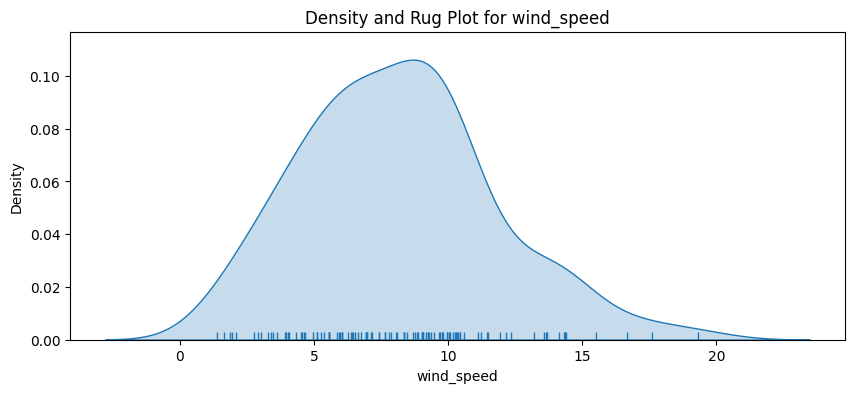

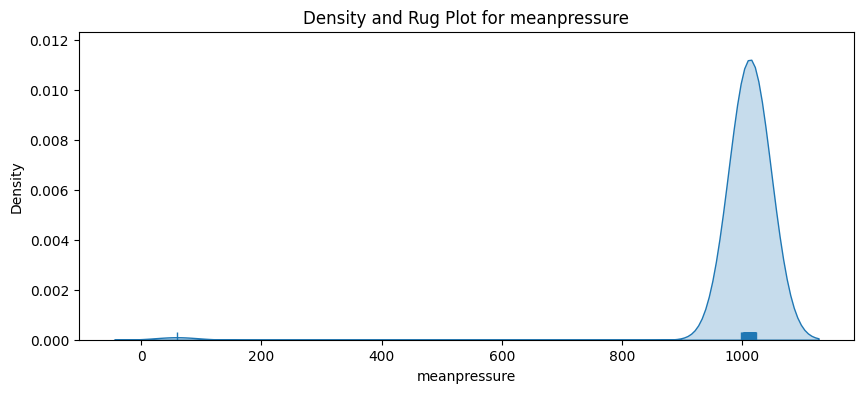

In [15]:
# Density plot with rug
for column in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(data[column], shade=True)
    sns.rugplot(data[column])
    plt.title(f'Density and Rug Plot for {column}')
    plt.show()

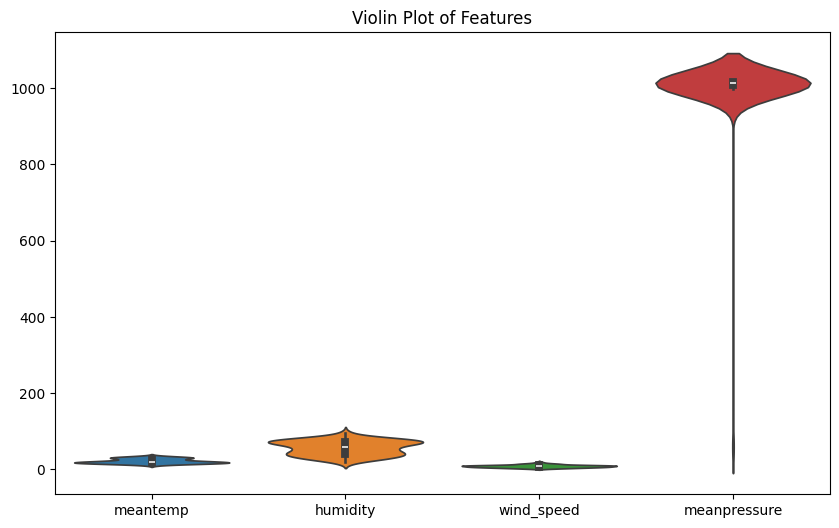

In [16]:
# Violin plot for categorical and continuous features
plt.figure(figsize=(10, 6))
sns.violinplot(data=data)
plt.title('Violin Plot of Features')
plt.show()

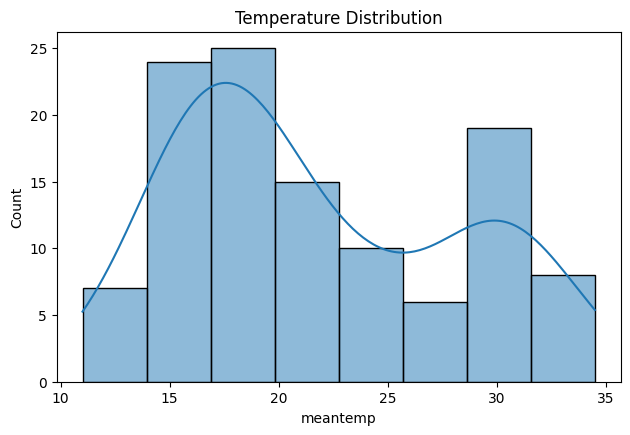

In [17]:
plt.figure(figsize=(16, 10))

# Temperature Distribution
plt.subplot(2, 2, 1)
sns.histplot(data['meantemp'], kde=True)
plt.title('Temperature Distribution')
plt.show()

In [18]:
#BIvariate Analysis

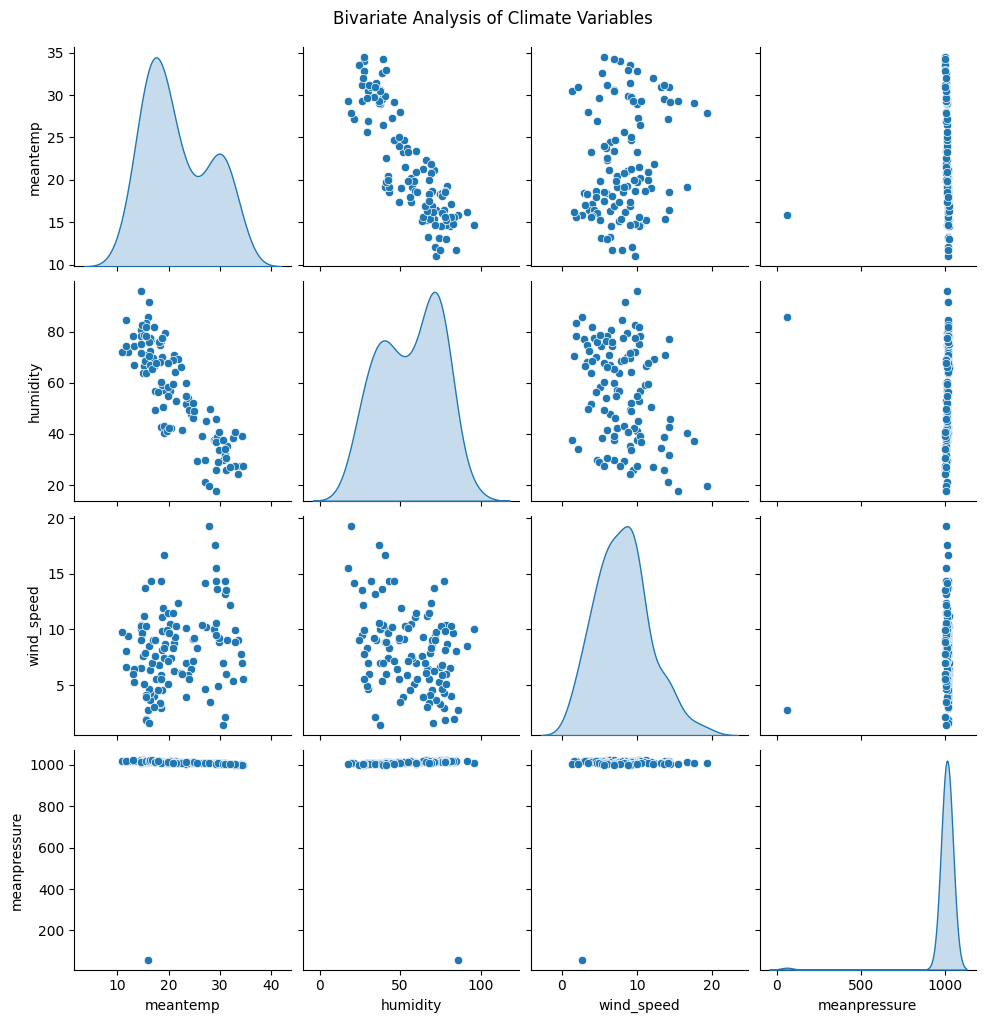

In [19]:
# Bivariate Analysis: Pairplot for relationships between numerical variables
sns.pairplot(data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']], diag_kind='kde')
plt.suptitle('Bivariate Analysis of Climate Variables', y=1.02)  # Adds title with some space above
plt.show()

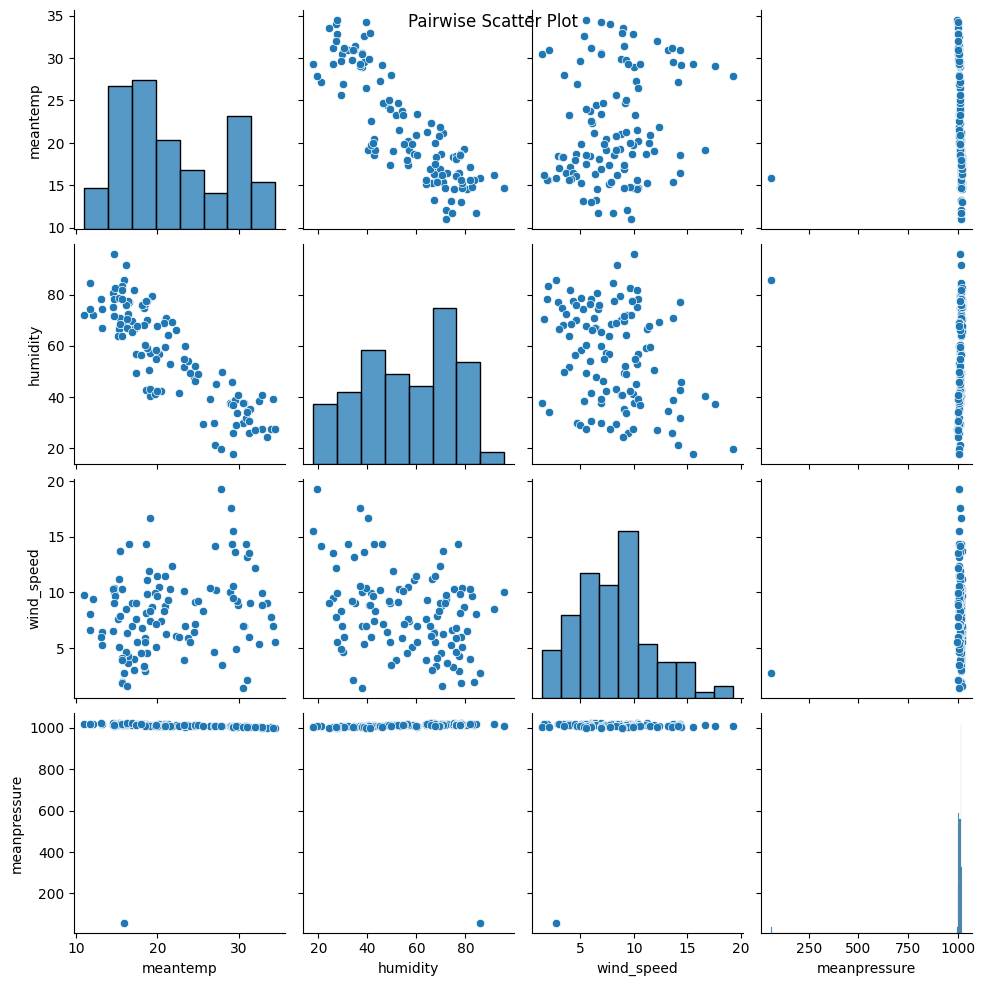

In [20]:
#Scatter Plots for Numerical Relationships
sns.pairplot(data)
plt.suptitle('Pairwise Scatter Plot')
plt.show()

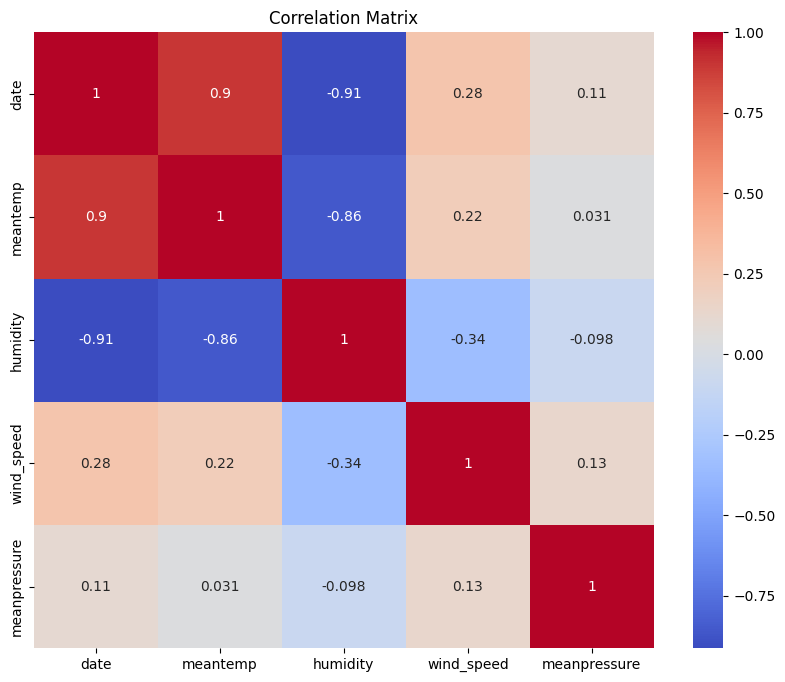

In [21]:
#Heat Map
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
#Multivariate Analysis

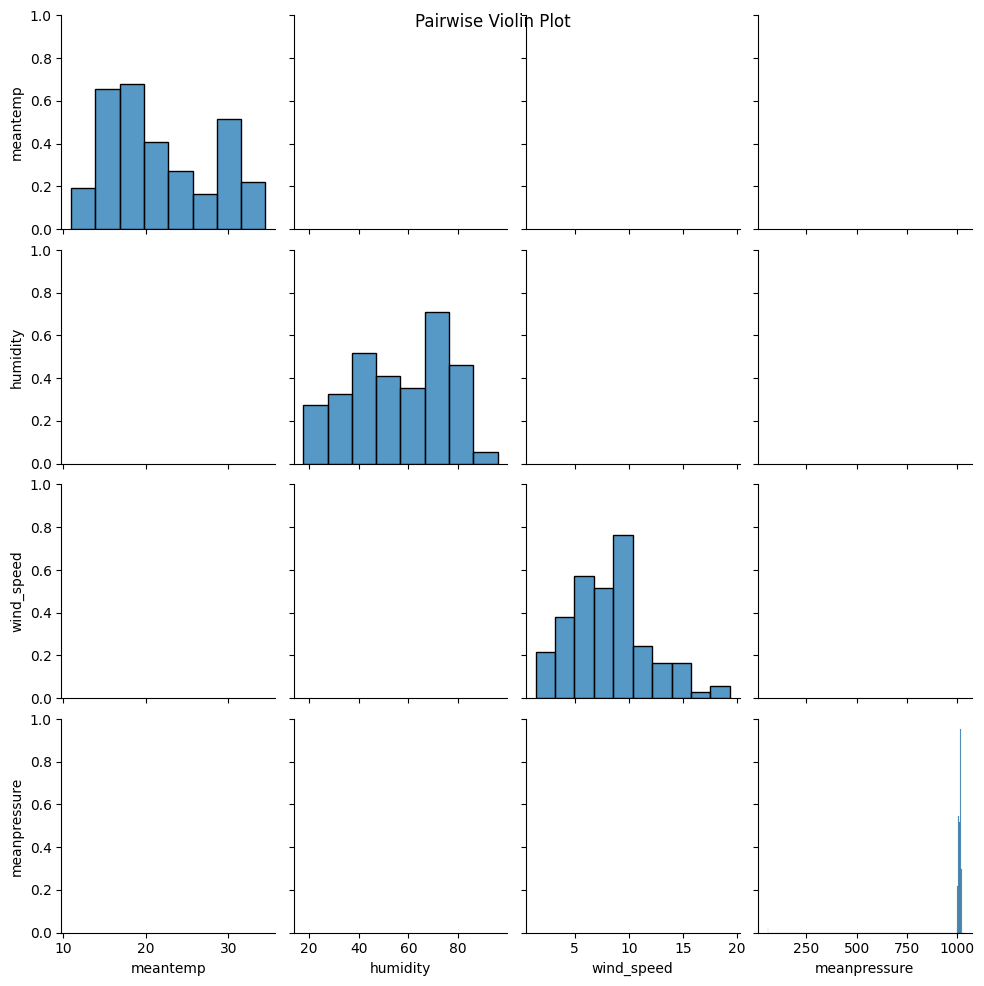

In [23]:
sns.pairplot(data, kind="violin")
plt.suptitle('Pairwise Violin Plot')
plt.show()


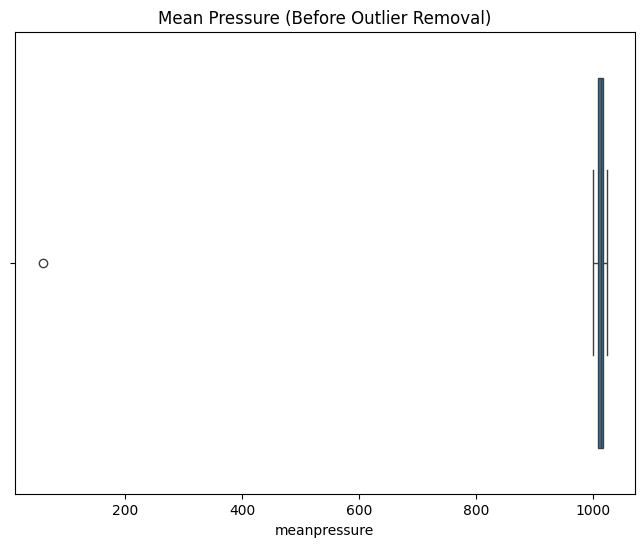

In [24]:
# Box Plot Before Outlier Removal
plt.figure(figsize=(8, 6))

sns.boxplot(x=data['meanpressure'])
plt.title('Mean Pressure (Before Outlier Removal)')
plt.show()

In [25]:
# Handle outliers (remove extreme outliers in pressure)
Q1 = data['meanpressure'].quantile(0.25)
Q3 = data['meanpressure'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['meanpressure'] < (Q1 - 1.5 * IQR)) | (data['meanpressure'] > (Q3 + 1.5 * IQR)))]

In [26]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727


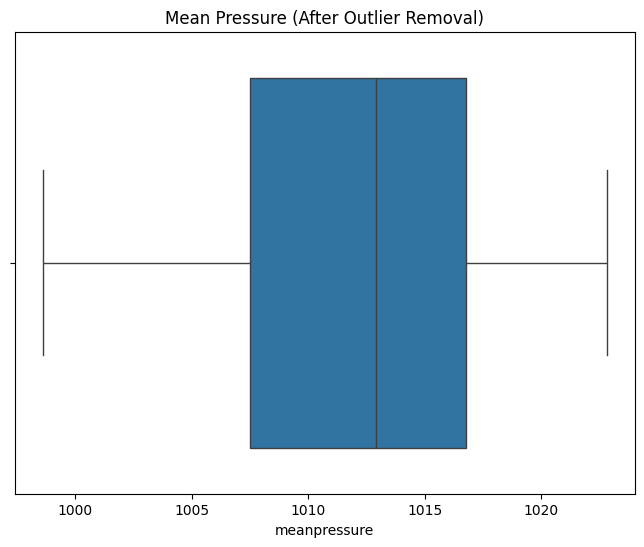

In [27]:
# Box Plot After Outlier Removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['meanpressure'])
plt.title('Mean Pressure (After Outlier Removal)')
plt.show()

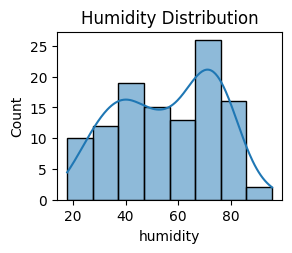

In [28]:
# Humidity Distribution
plt.subplot(2, 2, 2)
sns.histplot(data['humidity'], kde=True)
plt.title('Humidity Distribution')
plt.show()

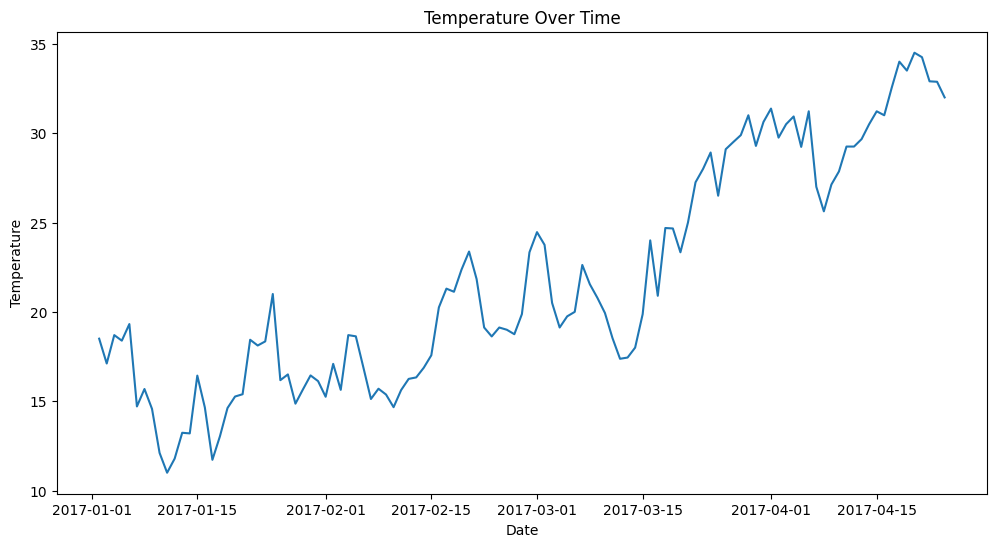

In [29]:
# Temperature over time
plt.figure(figsize=(12, 6))  # Sets the plot size
plt.plot(data['date'], data['meantemp'])  # Plots temperature against date
plt.title('Temperature Over Time')  # Adds a title to the plot
plt.xlabel('Date')  # Labels the x-axis
plt.ylabel('Temperature')  # Labels the y-axis
plt.show()  # Displays the plot

In [30]:
#new column 
data['actual_rainfall'] = 0.22 * data['humidity'] - 0.012 * data['meanpressure'] + 0.001 * data['wind_speed']+ 4.5 
# basic formula to display in mm/day with 4.5 as bias in cases of unpredictability of other factors
# Define features (independent variables) and target (dependent variable)
X = data[['humidity', 'wind_speed', 'meanpressure']] 
y = data['actual_rainfall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
data['predicted_rainfall'] = model.predict(X)

print(data[['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure', 'predicted_rainfall','actual_rainfall']].head())

        date   meantemp   humidity  wind_speed  meanpressure  \
1 2017-01-02  18.500000  77.222222    2.894444   1018.277778   
2 2017-01-03  17.111111  81.888889    4.016667   1018.333333   
3 2017-01-04  18.700000  70.050000    4.545000   1015.700000   
4 2017-01-05  18.388889  74.944444    3.300000   1014.333333   
5 2017-01-06  19.318182  79.318182    8.681818   1011.772727   

   predicted_rainfall  actual_rainfall  
1            9.272450         9.272450  
2           10.299572        10.299572  
3            7.727145         7.727145  
4            8.819078         8.819078  
5            9.817409         9.817409  


In [31]:
# Model Evaluation using RMSE 
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("\nModel Evaluation Metric:")
print(f"RMSE (Root Mean Squared Error): {rmse}")


Model Evaluation Metric:
RMSE (Root Mean Squared Error): 4.891559229515802e-15


In [32]:
# Hypothesis Testing Example: Testing Temperature Mean Difference 
data['year'] = data['date'].dt.year
temp_2017 = data[data['year'] == 2017]['meantemp']
temp_2018 = data[data['year'] == 2018]['meantemp']
t_stat, p_val = ttest_ind(temp_2017, temp_2018, nan_policy='omit')

print(f"\nHypothesis Testing Result: ")
if p_val < 0.05:
    print("There is a significant difference in mean temperatures between 2017 and 2018.")
else:
    print("No significant difference in mean temperatures between 2017 and 2018.")


Hypothesis Testing Result: 
No significant difference in mean temperatures between 2017 and 2018.


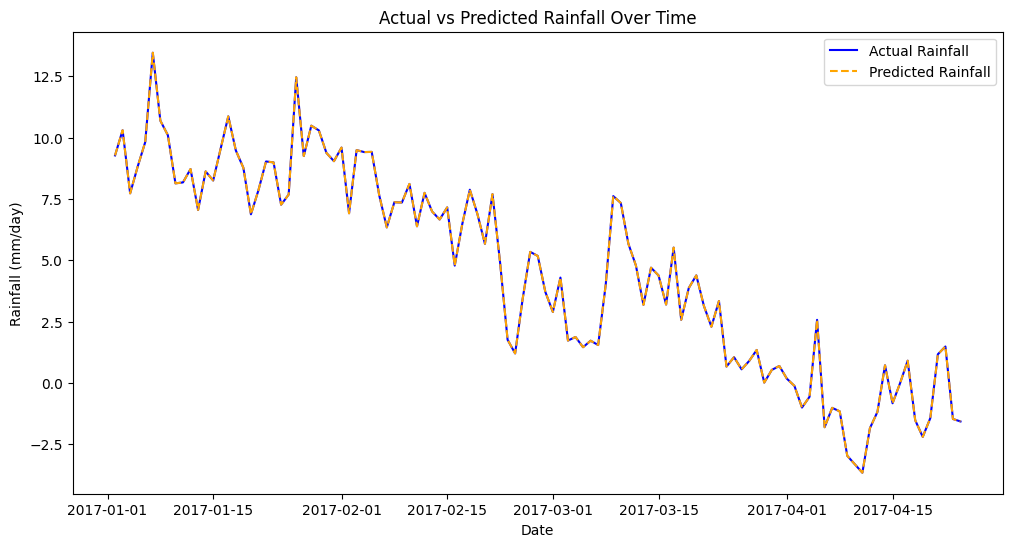

In [33]:
# Plotting Actual vs Predicted Rainfall
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['actual_rainfall'], label='Actual Rainfall', color='blue')
plt.plot(data['date'], data['predicted_rainfall'], label='Predicted Rainfall', color='orange', linestyle='--')
plt.title('Actual vs Predicted Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm/day)')
plt.legend()
plt.show()

In [34]:
# The linear regression model effectively predicts rainfall based on humidity, wind speed, and mean pressure.
# Given the low RMSE (Root Mean Squared Error), the model shows a high level of accuracy, indicating that the selected features
# have a strong relationship with rainfall predictions. The close alignment between actual and predicted rainfall values observed
# in the visualization further supports the model’s reliability.

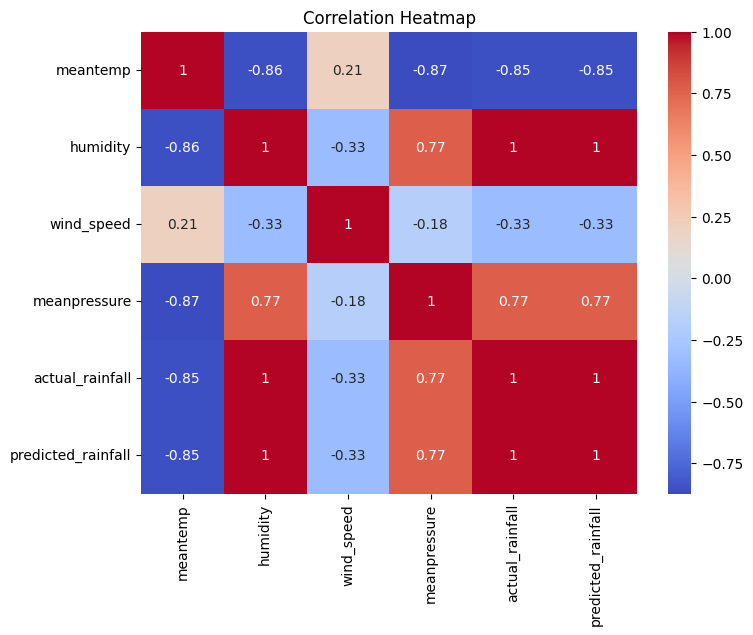

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'actual_rainfall','predicted_rainfall']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

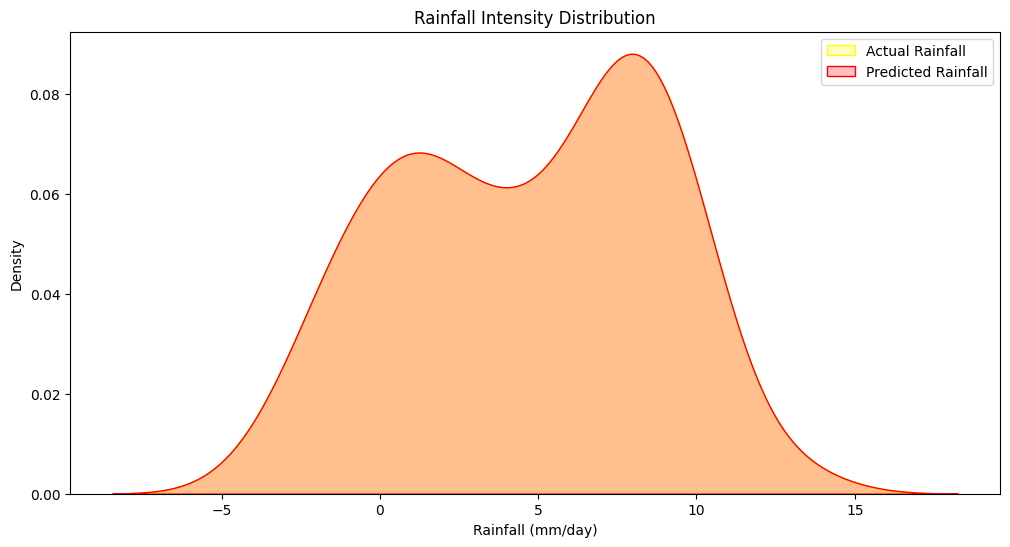

In [38]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data['actual_rainfall'], fill=True, color='yellow', label='Actual Rainfall')
sns.kdeplot(data['predicted_rainfall'], fill=True, color='red', label='Predicted Rainfall')
plt.title('Rainfall Intensity Distribution')
plt.xlabel('Rainfall (mm/day)')
plt.legend()
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Calculate 'actual_rainfall' based on the provided formula
data['actual_rainfall'] = 0.22 * data['humidity'] - 0.012 * data['meanpressure'] + 0.001 * data['wind_speed'] + 4.5

# Define rainfall categories
conditions = [
    (data['actual_rainfall'] < 1.2),
    (data['actual_rainfall'] >= 1.2) & (data['actual_rainfall'] < 5),
    (data['actual_rainfall'] >= 5) & (data['actual_rainfall'] < 8),
    (data['actual_rainfall'] >= 8)
]
categories = ['Non-rainy', 'Cloudy', 'Semi-rainy', 'Rainy']
data['rainfall_category'] = pd.cut(data['actual_rainfall'], bins=[-float('inf'), 1.2, 5, 8, float('inf')], labels=categories)

data.head()


,date,meantemp,humidity,wind_speed,meanpressure,actual_rainfall,predicted_rainfall,year,rainfall_category
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,9.272450,9.272450,2017,Rainy
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,10.299572,10.299572,2017,Rainy
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,7.727145,7.727145,2017,Semi-rainy
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,8.819078,8.819078,2017,Rainy
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727,9.817409,9.817409,2017,Rainy


In [50]:
# Prepare features (X) and target (y)
X = data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
y = LabelEncoder().fit_transform(data['rainfall_category'])  # Encode target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=categories))

              precision    recall  f1-score   support

   Non-rainy       1.00      0.88      0.93         8
      Cloudy       0.90      1.00      0.95         9
  Semi-rainy       1.00      1.00      1.00         7
       Rainy       1.00      1.00      1.00        10

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



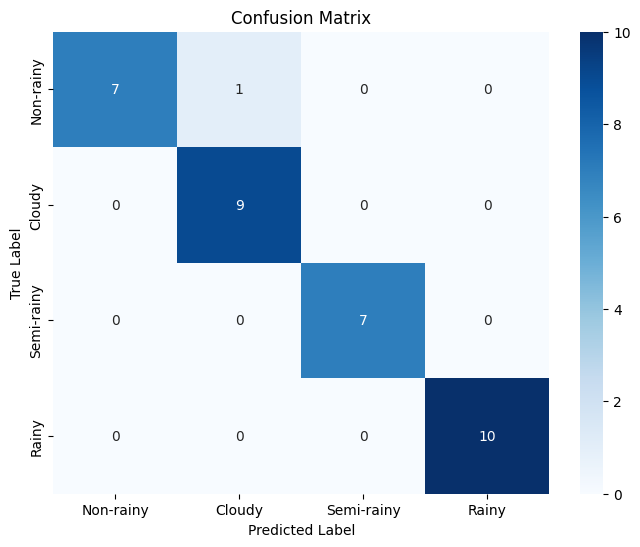

In [52]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
